# Car_pricePredictor ML Model

In [1]:
#importing pandas
import pandas as pd

In [2]:
#reading csv file for dataset 
df = pd.read_csv("dataset\\car data.csv")

In [3]:
#create extraa column of current year 
df['current_year'] = 2022

In [4]:
#droping inrrelavent column here we drop Car_name columns beacause we have selling price columns which is more relevent with predictive price
df = df.drop(columns = ["Car_Name"])

In [5]:
#create a new columns that  denotes car-age 
df["No_year"] = df["current_year"] - df["Year"]

In [6]:
#creating new dataframe where we droping some columns 
df_new = df.drop(columns = ["Year","current_year"])

# Exploratory_Data_analysis

In [7]:
df_new.shape

(301, 8)

In [8]:
#checking null values but this dataset didn't have null values so imputation of values not required
df_new.isnull().sum().sum()

0

In [9]:
#dataset have 3 object columns 1. Fuel type 2. Seller_Type 3. Transsission
df_new.select_dtypes("O").columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [10]:
#unique values of all 3 object columns
print(df_new["Fuel_Type"].unique())
print(df_new["Seller_Type"].unique())
print(df_new["Transmission"].unique())
print(df_new["Owner"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [11]:
df_new

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [12]:
df_new = pd.get_dummies(df_new,drop_first=True)

In [13]:
df_new

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,1,0,0,1
297,4.00,5.90,60000,0,7,0,1,0,1
298,3.35,11.00,87934,0,13,0,1,0,1
299,11.50,12.50,9000,0,5,1,0,0,1


In [14]:
import seaborn as sns

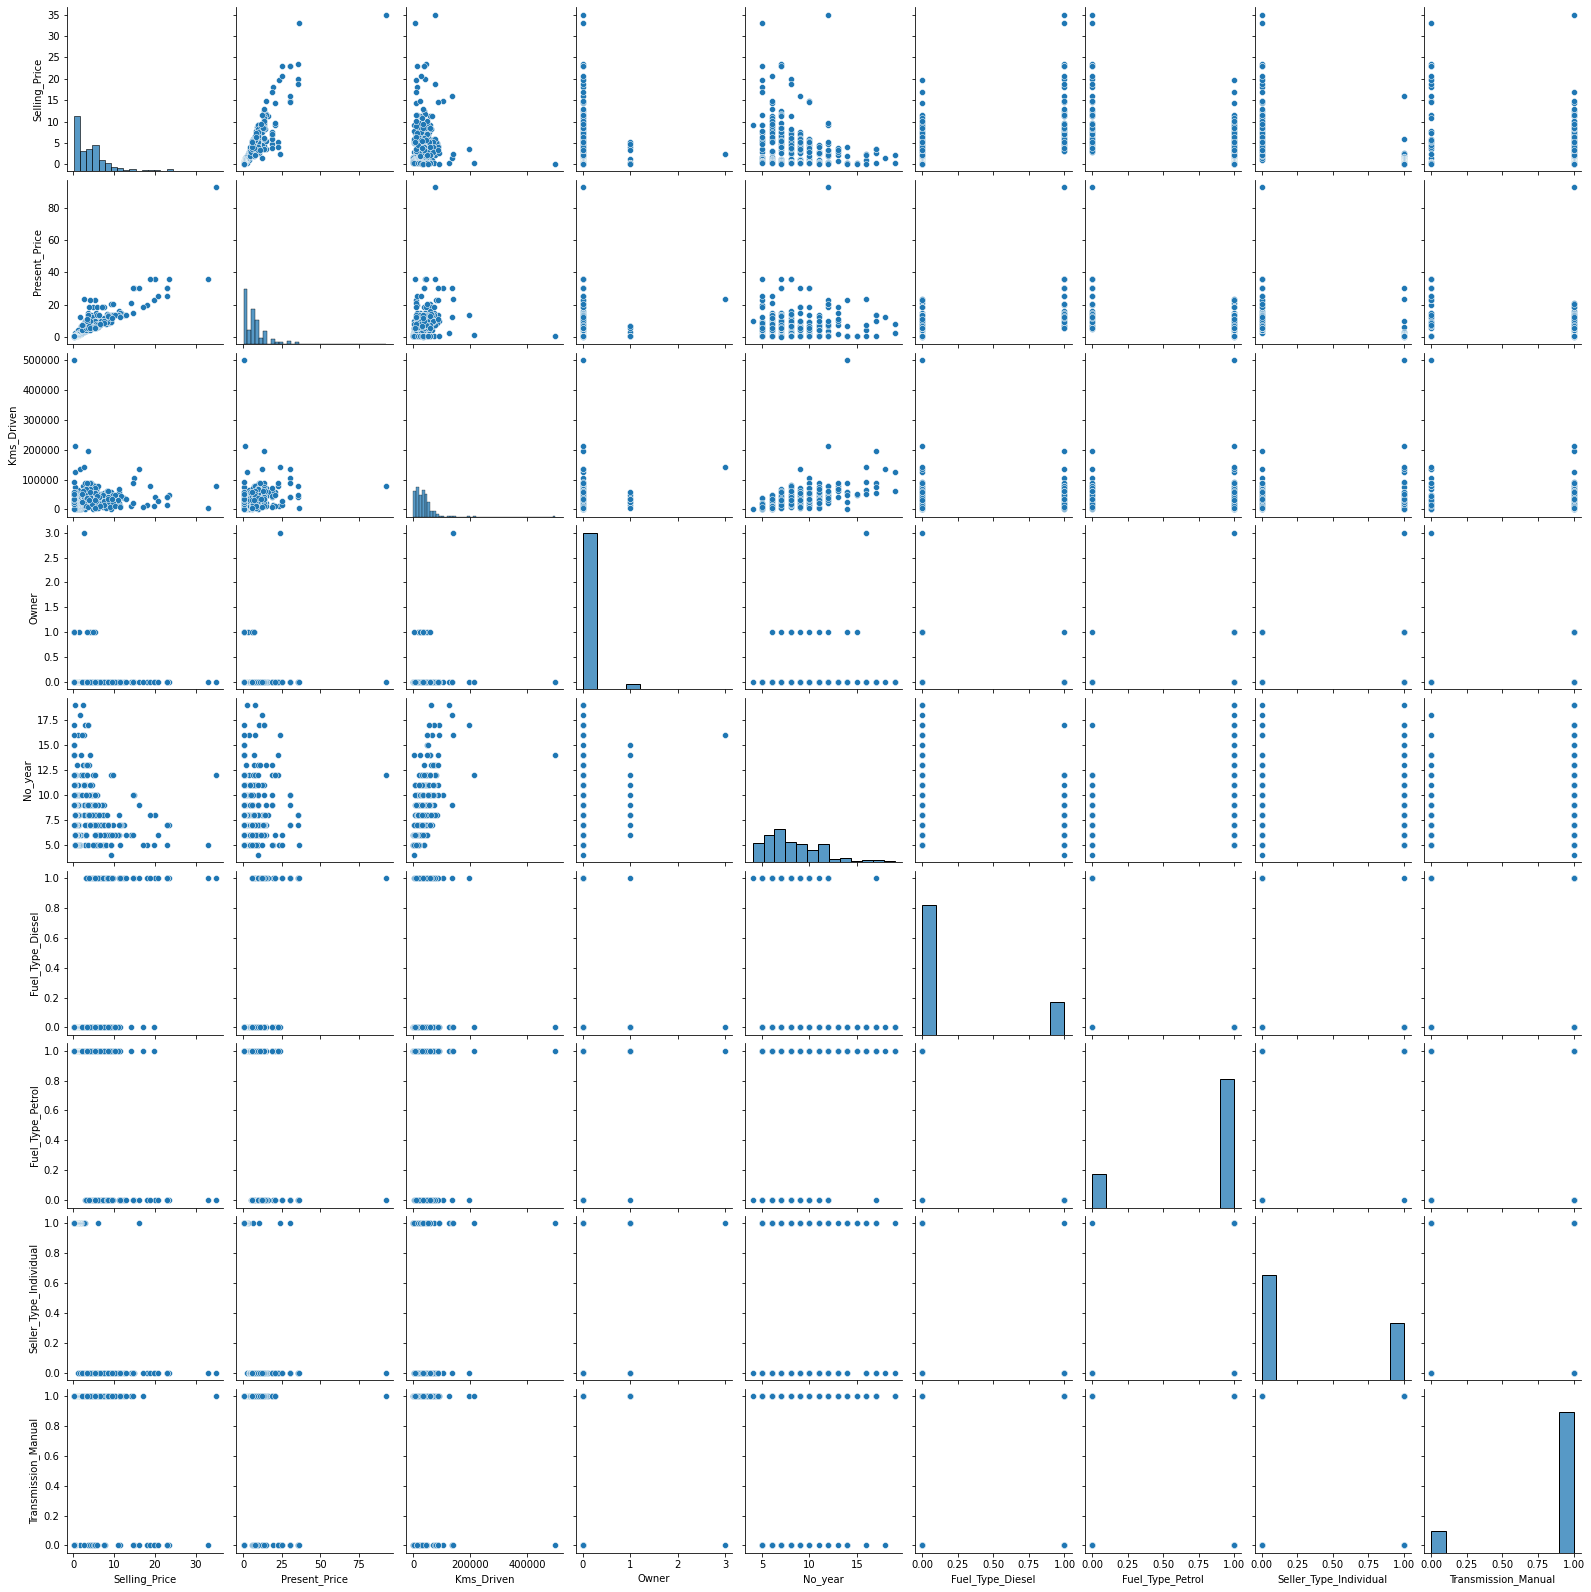

In [15]:
sns.pairplot(df_new)

<AxesSubplot:>

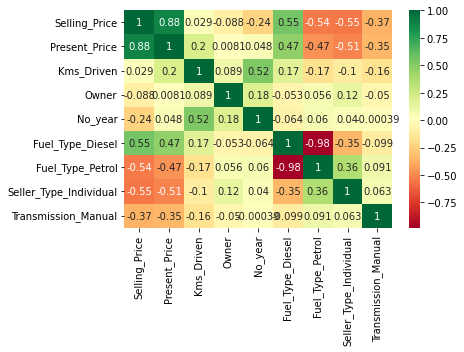

In [16]:
correlation_matrix = df_new.corr()
sns.heatmap(correlation_matrix,annot = True,cmap = "RdYlGn")

In [27]:
#split the target variable and independent variables 
X = df_new.iloc[:,1:]
Y = df_new.iloc[:,0]

In [34]:
#Checking the feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

In [35]:
model.fit(X,Y)

ExtraTreesRegressor()

In [38]:
#Feature Importance of features
print(model.feature_importances_)

[3.74202833e-01 4.32650167e-02 3.21958377e-04 7.38602629e-02
 2.32635277e-01 9.55031758e-03 1.22982912e-01 1.43181422e-01]


In [39]:
import matplotlib.pyplot as plt

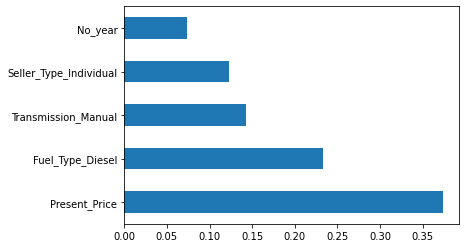

In [42]:
#plot the graph of features to visualize the which feature is more important
feature_importance = pd.Series(model.feature_importances_,X.columns)
feature_importance.nlargest(5).plot(kind = "barh")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [49]:
from sklearn.ensemble import RandomForestRegressor
random_f = RandomForestRegressor()

In [51]:
import numpy as np

In [52]:
##Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num =12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
#create a random grid 
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [56]:
rf = RandomForestRegressor()

In [57]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [58]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [60]:
prediction = rf_random.predict(X_test)
prediction

array([ 1.13099294,  5.15905373,  0.4571785 ,  0.55451672,  1.17682352,
        3.08150103, 21.36760476,  2.79538376,  6.98734058,  0.23514725,
        4.21518232,  0.65597012,  5.86046512,  7.33768977,  4.19694909,
        4.18499131,  2.91901848,  1.44079501, 10.02486435,  5.18933971,
       10.56586608,  4.40224572,  3.2598647 ,  7.463458  ,  5.70476108,
        6.05279521, 10.30039005, 10.02113492, 10.0379224 ,  3.0348257 ,
        4.11329977,  5.3298743 , 20.28077987, 15.70682912,  7.1818751 ,
       10.60794823,  4.75623873,  4.46371425,  2.68754636,  0.24662566,
        4.27463467,  5.86046831, 22.00969323,  4.79914119, 10.27623419,
        7.47368945,  0.23985521,  5.28092218,  0.654479  ,  0.5681177 ,
       21.49559221,  4.51330391,  6.98033438,  5.33900774,  7.48305249,
        0.50424023,  0.43643063,  0.4258273 ,  7.42828731,  3.11341337,
        1.14906748])

C:\Users\NARENDRA MEENA\.conda\envs\carprice\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NARENDRA MEENA\.conda\envs\carprice\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

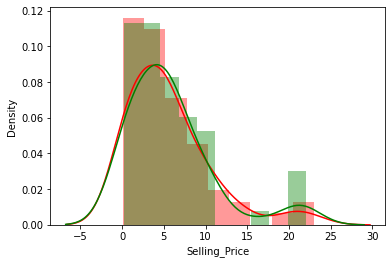

In [64]:
sns.distplot(Y_test,color = "red")
sns.distplot(prediction,color = "green")

In [65]:
from sklearn.metrics import r2_score
r2_score(Y_test,prediction)

0.9224161810598336

In [68]:
 #storing the model
import pickle
file = open('random_forest_regression.pkl','wb')
pickle.dump(rf_random,file)